### Compony Bankruptcy data analyis and feature selection technique for getting dataframe with less number and more predictive features for bankrupcy chance prediction of company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [2]:
data = pd.read_csv('drive/MyDrive/Datasets/bankeuptcy.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating expense rate,research and development expense rate,cash flow rate,interest-bearing debt interest rate,tax rate (A),per Net Share Value (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan),Operating Profit Per Share (Yuan),Per Share Net profit before tax (yuan),realized sales gross profit growth rate,operating profit growth rate,after-tax net profit growth rate,regular net profit growth rate,continuous net profit growth rate,total asset growth rate,net value growth rate,total asset return growth rate Ratio,cash reinvestment %,current ratio,quick ratio,interest expense ratio,total debt/total net worth,debt ratio %,net worth/assets,long-term fund suitability ratio (A),...,current assets/total assets,cash / total assets,Quick asset /current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,current liability / liability,working capital/equity,current liability/equity,long-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal turnover rate,cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.

In [3]:
data.isnull().sum().any()

False

 Seperating the attributes and label columns

In [4]:
y = data['Bankrupt?']
data_X = data.drop(['Bankrupt?'],axis = 1)

###Feature Selection

1. Removing Columns with very low variance value

In [5]:
data_X_mean = np.mean(data_X, axis = 0)
variance = np.var(data_X/data_X_mean,axis = 0)
variance_df = pd.DataFrame(variance, columns= ['Variance'])
variance_df.sort_values(by = 'Variance')

,Variance
one if net income was negative for the last two year zero otherwise,0.000000
operating profit growth rate,0.000161
operating profit rate,0.000170
Cash flow to Sales,0.000193
working capitcal turnover rate,0.000227
...,...
Quick asset /current liabilities,2281.318433
revenue per person,3450.486394
net value growth rate,5312.004777
fix assets to assets,6817.997213


In [6]:
from sklearn.feature_selection import VarianceThreshold
VT = VarianceThreshold(5.0).fit(data_X/data_X_mean)
VT_transform = VT.transform(data_X/data_X_mean)
high_var_column = data_X.columns[VT.get_support()]
low_var_column = data_X.columns[~VT.get_support()]
print('Total columns: ', data_X.shape[1])
print('Removed columns: ',len(low_var_column))
print('Remaining columns: ',len(high_var_column))

Total columns:  95
Removed columns:  74
Remaining columns:  21


In [26]:
print('Features with high variance value: ',high_var_column)

Features with high variance value:  Index([' interest-bearing debt interest rate', ' Revenue Per Share (Yuan)',
       ' net value growth rate', ' current ratio', ' quick ratio',
       ' total debt/total net worth', ' long-term fund suitability ratio (A)',
       ' accounts receivable turnover', ' average collection days',
       ' fixed assets Turnover frequency', ' revenue per person',
       ' allocation rate per person', 'Quick asset /current liabilities',
       'cash / current liability', 'Inventory/current liability',
       'long-term liability to current assets', 'total income / total expense',
       ' current asset turnover rate', ' fix assets to assets',
       'one if total liabilities exceeds total assets zero otherwise',
       'total assets to GNP price'],
      dtype='object')


2. SelectkBest feature selection method

In [8]:
from sklearn.feature_selection import SelectKBest,chi2
data.shape

(6819, 96)

In [25]:
data_new = SelectKBest(chi2,k=20)
data_new.fit_transform(data_X, y)
cols = data_new.get_support(indices = True)
features_selectkbest = data_X.iloc[:,cols]
print('Features obtained from selectkbest method: ',features_selectkbest.columns)

Features obtained from selectkbest method:  Index([' operating expense rate', ' research and development expense rate',
       ' interest-bearing debt interest rate', ' Revenue Per Share (Yuan)',
       ' total asset growth rate', ' net value growth rate', ' quick ratio',
       ' total debt/total net worth', ' accounts receivable turnover',
       ' average collection days', ' fixed assets Turnover frequency',
       ' revenue per person', ' allocation rate per person',
       'Quick asset /current liabilities', 'cash / current liability',
       ' current asset turnover rate', ' quick asset turnover rate',
       ' cash turnover rate', ' fix assets to assets',
       'total assets to GNP price'],
      dtype='object')


In [10]:
data_new.shape

(6819, 20)

3. Recursive Feature Elimination

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(n_estimators = 200)
rfe = RFE(estimator,n_features_to_select = 20).fit(data_X,y)
rfe_transform = rfe.transform(data_X)
rfe_transform.shape

(6819, 20)

In [27]:
selected_features = data_X.columns[rfe.support_]
print('features obtained from Recursive feature elimintaion technique: ',selected_features)

features obtained from Recursive feature elimintaion technique:  Index([' non-industry income and expenditure/revenue',
       ' interest-bearing debt interest rate', ' per Net Share Value (B)',
       ' Net Value Per Share (A)', ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (yuan)', ' net value growth rate',
       ' quick ratio', ' interest expense ratio', ' debt ratio %',
       ' net worth/assets', ' borrowing dependency',
       ' net profit before tax/paid-in capital',
       ' fixed assets Turnover frequency', 'cash / total assets',
       'working capital/equity', 'net income to total assets',
       'Net income to stockholder's Equity',
       'Degree of financial leverage (DFL)',
       'Interest coverage ratio( Interest expense to EBIT )'],
      dtype='object')


In [13]:
pd.Series(selected_features).to_csv('Selected_features.csv', index = False)

The value counts in labels are

In [14]:
y.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

0 - not bankrupt, 1 - bankrupt

In [15]:
features = pd.read_csv('Selected_features.csv')

In [16]:
features = features['0'].to_list() + ['Bankrupt?']

In [17]:
df_new = data[features]
print(df_new.shape)
df_new.head()

(6819, 21)


,non-industry income and expenditure/revenue,interest-bearing debt interest rate,per Net Share Value (B),Net Value Per Share (A),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (yuan),net value growth rate,quick ratio,interest expense ratio,debt ratio %,net worth/assets,borrowing dependency,net profit before tax/paid-in capital,fixed assets Turnover frequency,cash / total assets,working capital/equity,net income to total assets,Net income to stockholder's Equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),Bankrupt?
0,0.302646,0.000725,0.147950,0.147950,0.169141,0.138736,0.000327,0.001208,0.629951,0.207576,0.792424,0.390284,0.137757,1.165007e-04,0.004094,0.721275,0.716845,0.827890,0.026601,0.564050,1
1,0.303556,0.000647,0.182251,0.182251,0.208944,0.169918,0.000443,0.004039,0.635172,0.171176,0.828824,0.376760,0.168962,7.190000e+08,0.014948,0.731975,0.795297,0.839969,0.264577,0.570175,1
2,0.302035,0.000790,0.177911,0.177911,0.180581,0.142803,0.000396,0.005348,0.629631,0.207516,0.792484,0.379093,0.148036,2.650000e+09,0.000991,0.742729,0.774670,0.836774,0.026555,0.563706,1
3,0.303350,0.000449,0.154187,0.154187,0.193722,0.148603,0.000382,0.002896,0.630228,0.151465,0.848535,0.379743,0.147561,9.150000e+09,0.018851,0.729825,0.739555,0.834697,0.026697,0.564663,1
4,0.303475,0.000686,0.167502,0.167502,0.212537,0.168412,0.000439,0.003727,0.636055,0.106509,0.893491,0.375025,0.167461,2.935211e-04,0.014161,0.732000,0.795016,0.839973,0.024752,0.575617,1


In [33]:
df_new.to_csv('company_bankruptcy_cleaned.csv', index = False)

In [30]:
a = high_var_column
b = features_selectkbest.columns
c = selected_features
a,b,c = map(set,(a,b,c))
imp_features = a.intersection(b,c)
imp_features

{' fixed assets Turnover frequency',
 ' interest-bearing debt interest rate',
 ' net value growth rate',
 ' quick ratio'}

These above 4 features are common in all three feature selection techniques, i.e they have high variance, best k scores and also passed thr recursive feature elimination technique.
So among all other, they are bit important attributes in solving the predictive problem of company bankrupcy

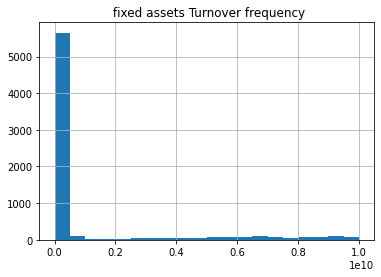

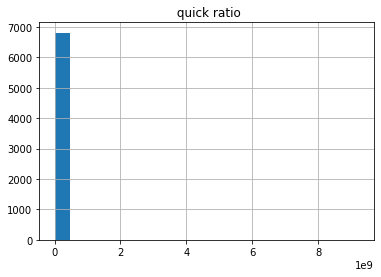

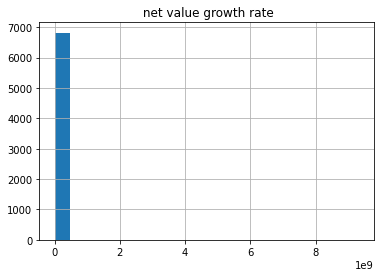

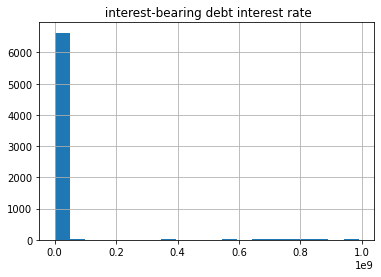

In [32]:
for i in imp_features:
  data_X.hist(i, bins = 20 )